# 01
### Your Friend has developed the Product and he wants to establish the product startup and he is searching for a perfect location where getting the investment has a high chance. But due to its financial restriction, he can choose only between three locations -  Bangalore, Mumbai, and NCR. As a friend, you want to help your friend deciding the location. NCR include Gurgaon, Noida and New Delhi. Find the location where the most number of funding is done. That means, find the location where startups has received funding maximum number of times. Plot the bar graph between location and number of funding. Take city name "Delhi" as "New Delhi". Check the case-sensitiveness of cities also. That means, at some place instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore". For few startups multiple locations are given, one Indian and one Foreign. Consider the startup if any one of the city lies in given locations.

#### code

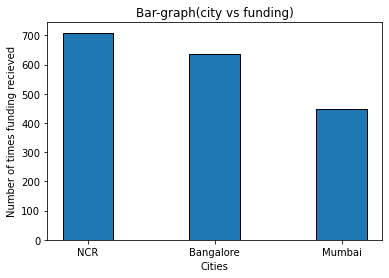

NCR has got maximum funding


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
def create(city):
    l=[]
    for i in city:
        if '/' in i:
            string=i.strip().split('/')
            for j in string:
                l.append(j.strip())
        else:
            l.append(i)
    return l
df=pd.read_csv("startup_funding.csv")
df=df[['CityLocation']].copy()
##removed nan->>
df=df[(df.CityLocation.isnull()==False)]

##split multiple entry rows
resl=pd.DataFrame(create(df.CityLocation))
resl.replace("Delhi","New Delhi",inplace=True)
resl.replace("bangalore","Bangalore",inplace=True)
resl.replace("Gurgaon","NCR",inplace=True)
resl.replace('Noida',"NCR",inplace=True)
resl.replace('New Delhi',"NCR",inplace=True)

##find the needed cities number of funding from res1
resl=resl.value_counts()
dictl={"Bangalore":resl.Bangalore,"Mumbai":resl.Mumbai,"NCR":resl.NCR}
dictl=dict(sorted(dictl.items(),key=lambda x:x[1],reverse=True))
plt.bar(dictl.keys(),dictl.values(),edgecolor="black",width=0.4)
plt.xlabel("Cities")
plt.ylabel("Number of times funding recieved")
plt.title("Bar-graph(city vs funding)")
plt.show()
print(list(dictl)[0],"has got maximum funding")

### Explanation
#### step1- import the needed libraries
#### step2- read the dataframe using read_csv() keyword
#### step3- from the dataframe take the column 'CityLocation' for doing calculations
#### step4- remove nan values from column
#### step5- if in a row there is multiple entries split those to seperate row entries using the create() function
####             and return the resulting list
#### step6- replace delhi and banglore with its correct spelling
#### step7- use value_counts on the resultant dataframe to get count of each entries seperatly
#### step8- from the result returned by value_counts take the 5 cities that we are intrested in
#### step9- plot the bar graph using"plt.bar()" function in matplotlib library
#### step10- take the maximum valued city name from the graph as the result.

# 02

### Even after trying for so many times, your friend’s startup could not find the investment. So you decided to take this matter in your hand and try to find the list of investors who probably can invest in your friend’s startup. Your list will increase the chance of your friend startup getting some initial investment by contacting these investors. Find the top 5 investors who have invested maximum number of times (consider repeat investments in one company also). In a startup, multiple investors might have invested. So consider each investor for that startup. Ignore undisclosed investors.

### code

Sequoia Capital
Accel Partners
Kalaari Capital
SAIF Partners
Indian Angel Network


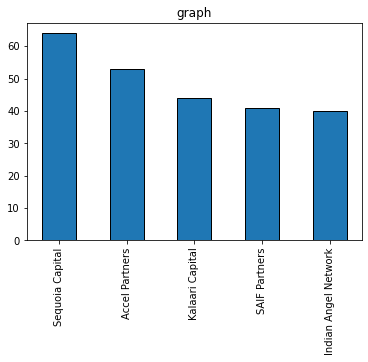

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv("startup_funding.csv")
df=df[['InvestorsName']].copy()
df=df[(df.InvestorsName.isnull()==False)]
def create(name):
    l=[]
    for i in name:
        if ',' in i:
            string=i.strip().split(',')
            for j in string:
                l.append(j.strip())
        else:
            l.append(i.strip())
    return l
resl=pd.DataFrame(create(df.InvestorsName))
resl=resl.value_counts()
x=[]
y=[]
for i in range(5):
    print(str(resl.index[i]).replace("('","").replace("',)",""))
    x.append(str(resl.index[i]).replace("('","").replace("',)",""))
    y.append(resl.values[i])
plt.bar(x,y,edgecolor="black",width=0.5)
plt.title("graph")
plt.xticks(rotation=90)
plt.show()

### Explanation
#### step1- import the needed libraries
#### step2- read the dataframe using read_csv() keyword
#### step3- from the dataframe take the column 'InvestorsName' for doing calculations
#### step4- remove nan values from column
#### step5- if in a row there is multiple entries split those to seperate row entries using the create() function
####         and return the resulting list
#### step6- After getting the cleaned data from create function apply 'value_counts()' function to get the entries and its count
#### step7- as value_count returns the result by sorting based on the numerics print the first 5 entries from it which will be our result
#### step8- plot the bar graph with these 5 entries.

# 03

### After re-analysing the dataset you found out that some investors have invested in the same startup at different number of funding rounds. So before finalising the previous list, you want to improvise it by finding the top 5 investors who have invested in different number of startups. This list will be more helpful than your previous list in finding the investment for your friend startup. Find the top 5 investors who have invested maximum number of times in different companies. That means, if one investor has invested multiple times in one startup, count one for that company. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

### code

C:\Users\HP\AppData\Local\Temp\ipykernel_4624\2427817384.py:8: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


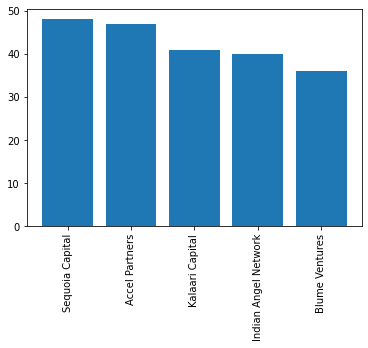

Sequoia Capital 48
Accel Partners 47
Kalaari Capital 41
Indian Angel Network 40
Blume Ventures 36


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv("startup_funding.csv")
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

def create(df):
    needed=df.InvestorsName
    start=df.StartupName
    invn=[]
    startup=[]
    for i in range(needed.size):
        if ',' in str(needed.iloc[i]).strip():
            k=str(needed.iloc[i]).strip().split(',')
            for j in k:
                startup.append(start.iloc[i].strip())
                invn.append(j.strip())
        else:
            startup.append(start.iloc[i].strip())
            invn.append(needed.iloc[i].strip())
    return startup,invn

df=df[['InvestorsName','StartupName']]
df=df[(df.InvestorsName.isnull()==False)]
df["StartupName"].replace("Oyo Rooms","Oyo",inplace=True)
df["StartupName"].replace("OyoRooms","Oyo",inplace=True)
df["StartupName"].replace("OYO Rooms","Oyo",inplace=True)
df["StartupName"].replace("Oyorooms","Oyo",inplace=True)
df["StartupName"].replace("Ola Cabs","Ola",inplace=True)
df["StartupName"].replace("Olacabs","Ola",inplace=True)
df["StartupName"].replace("Paytm Marketplace","Paytm",inplace=True)
df["StartupName"].replace("Flipkart.com","Flipkart",inplace=True)
df=pd.DataFrame(create(df))
df=df.T
df.columns=["startup","investor"]
resl=df.groupby('investor')['startup'].nunique().sort_values(ascending=False)[0:6]
resl=resl.drop([''])
plt.bar(resl.index,resl.values)
plt.xticks(rotation=90)
plt.show()
for i in range(resl.size):
    print(resl.index[i],resl.values[i])

### Explanation

#### step1-import the needed libraries
#### step2-read the file
#### step3-the (set_option) is used to display the entire dataframe for easy analysis if data
#### step4-take the 'InvestorsName','StartupName' columns which is needed to solve the problem
#### step5-remove nan values
#### step6-some names are wrongly entered in the dataframe so correct it using replace() keyword
#### step7-transpose the dataframe to change rows to columns and viceversa
#### step8-give proper column names for the dataframe
#### step9-group the data based on 'investorname' and out of that result find the unique entries in 'startup'
####       column and map each investor name to this unique value count
#### step10-drop the ""(empystring)[undisclosed investor] asper the question
#### step11-print the needed entries from the result returned by groupby keyword
#### step12-plot the bargraph with the data

# 04

### Even after putting so much effort in finding the probable investors, it didn't turn out to be helpful for your friend. So you went to your investor friend to understand the situation better and your investor friend explained to you about the different Investment Types and their features. This new information will be helpful in finding the right investor. Since your friend startup is at an early stage startup, the best-suited investment type would be - Seed Funding and Crowdfunding. Find the top 5 investors who have invested in a different number of startups and their investment type is Crowdfunding or Seed Funding. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

### code

Indian Angel Network 33
Rajan Anandan 23
LetsVenture 16
Anupam Mittal 16
Kunal Shah 14


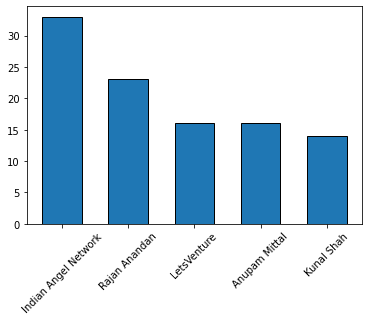

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv("startup_funding.csv")
df=df[['InvestorsName','StartupName','InvestmentType']].copy()
df=df[(df.InvestorsName.isnull()==False) & (df.InvestmentType.isnull()==False) &(df.StartupName.isnull()==False)]
def create(df):
    name=df.InvestorsName
    typel=df.InvestmentType
    a=df.StartupName
    investorname=[]
    investtype=[]
    startup=[]
    for i in range(name.size):
        if ',' in str(name.iloc[i]).strip():
            string=str(name.iloc[i]).strip().split(',')
            for j in string:
                investorname.append(j.strip())
                investtype.append(str(typel.iloc[i]).strip())
                startup.append(str(a.iloc[i].strip()))
        else:
            investorname.append(str(name.iloc[i]).strip())
            investtype.append(str(typel.iloc[i]).strip())
            startup.append(str(a.iloc[i].strip()))
    return investorname,investtype,startup
resl=pd.DataFrame(create(df))
resl=resl.T
resl.columns=["name","type","company"]
resl.type.replace('PrivateEquity',"Private Equity",inplace=True)
resl.type.replace('SeedFunding',"Seed Funding",inplace=True)
resl.type.replace('Crowd funding',"Crowd Funding",inplace=True)

resl["company"].replace("Oyo Rooms","Oyo",inplace=True)
resl["company"].replace("OyoRooms","Oyo",inplace=True)
resl["company"].replace("OYO Rooms","Oyo",inplace=True)
resl["company"].replace("Oyorooms","Oyo",inplace=True)
resl["company"].replace("Ola Cabs","Ola",inplace=True)
resl["company"].replace("Olacabs","Ola",inplace=True)
resl["company"].replace("Paytm Marketplace","Paytm",inplace=True)
resl["company"].replace("Flipkart.com","Flipkart",inplace=True)


resl=resl[(resl.type=="Seed Funding") | (resl.type=="Crowd Funding")]
resl=resl.groupby("name")["company"].nunique().sort_values(ascending=False)[:8]
resl=resl.drop(["Undisclosed Investors","Undisclosed investors",''])
for i in range(5):
    print(resl.index[i],resl.values[i])
plt.bar(resl.index,resl.values,edgecolor="black",width=0.6)
plt.xticks(rotation=45)
plt.show()

### Explanation

#### step1-import the needed libraries
#### step2-read the file
#### step4-take the 'InvestorsName','InvestmentType' and 'startupname' columns which is needed to solve the problem
#### step5-remove nan values
#### step6-split the InvestorsName based on ',' and add each entries to unique rows done using create() function
#### step7-transpose the dataframe to change rows to columns and viceversa
#### step8-give proper column names for the dataframe
#### step9-correct the spelling of 'investmenttype' column entries
#### step10-correct the spelling of 'companyname' column entries
#### step11-take the 'seedfunding' and 'crowdfunding' row entry from the cleaned dataframe
#### step9-group the data based on 'investorname' and out of that result find the totalcount of unique elements in 'company'
####       column and map each investor name to this count
#### step10-drop the ""(empystring)[undisclosed investor] asper the question
#### step11-print the needed entries from the result returned by groupby keyword
#### step12-plot the bargraph with the data




# 05

### Due to your immense help, your friend startup successfully got seed funding and it is on the operational mode. Now your friend wants to expand his startup and he is looking for new investors for his startup. Now you again come as a saviour to help your friend and want to create a list of probable new new investors. Before moving forward you remember your investor friend advice that finding the investors by analysing the investment type. Since your friend startup is not in early phase it is in growth stage so the best-suited investment type is Private Equity. Find the top 5 investors who have invested in a different number of startups and their investment type is Private Equity. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

### code

Sequoia Capital 45
Accel Partners 43
Kalaari Capital 35
Blume Ventures 27
SAIF Partners 24


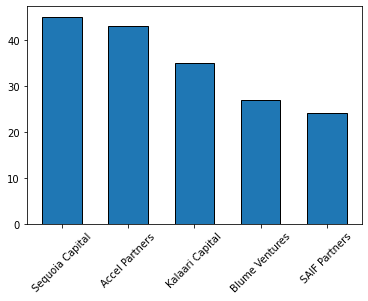

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv("startup_funding.csv")
df=df[['InvestorsName','StartupName','InvestmentType']].copy()
df=df[(df.InvestorsName.isnull()==False) & (df.InvestmentType.isnull()==False) &(df.StartupName.isnull()==False)]
def create(df):
    name=df.InvestorsName
    typel=df.InvestmentType
    a=df.StartupName
    investorname=[]
    investtype=[]
    startup=[]
    for i in range(name.size):
        if ',' in str(name.iloc[i]).strip():
            string=str(name.iloc[i]).strip().split(',')
            for j in string:
                investorname.append(j.strip())
                investtype.append(str(typel.iloc[i]).strip())
                startup.append(str(a.iloc[i].strip()))
        else:
            investorname.append(str(name.iloc[i]).strip())
            investtype.append(str(typel.iloc[i]).strip())
            startup.append(str(a.iloc[i].strip()))
    return investorname,investtype,startup
resl=pd.DataFrame(create(df))
resl=resl.T
resl.columns=["name","type","company"]
resl.type.replace('PrivateEquity',"Private Equity",inplace=True)
resl.type.replace('SeedFunding',"Seed Funding",inplace=True)
resl.type.replace('Crowd funding',"Crowd Funding",inplace=True)
resl["company"].replace("Oyo Rooms","Oyo",inplace=True)
resl["company"].replace("OyoRooms","Oyo",inplace=True)
resl["company"].replace("OYO Rooms","Oyo",inplace=True)
resl["company"].replace("Oyorooms","Oyo",inplace=True)
resl["company"].replace("Ola Cabs","Ola",inplace=True)
resl["company"].replace("Olacabs","Ola",inplace=True)
resl["company"].replace("Paytm Marketplace","Paytm",inplace=True)
resl["company"].replace("Flipkart.com","Flipkart",inplace=True)
resl=resl[(resl.type=="Private Equity") ]
resl=resl.groupby("name")["company"].nunique().sort_values(ascending=False)[:5]
for i in range(5):
    print(resl.index[i],resl.values[i])
plt.bar(resl.index,resl.values,edgecolor="black",width=0.6)
plt.xticks(rotation=45)
plt.show()

### Explanation

#### step1-import the needed libraries
#### step2-read the file
#### step4-take the 'InvestorsName','InvestmentType' and 'startupname' columns which is needed to solve the problem
#### step5-remove nan values
#### step6-split the InvestorsName based on ',' and add each entries to unique rows done using create() function
#### step7-transpose the dataframe to change rows to columns and viceversa
#### step8-give proper column names for the dataframe
#### step9-correct the spelling of 'investmenttype' column entries
#### step10-correct the spelling of 'companyname' column entries
#### step11-take the 'private eqity'row entry from the cleaned dataframe
#### step11-group the data based on 'investorname' and out of that result find the totalcount of unique elements in 'company'
####              column and map each investor name to this count
#### step12-print the needed entries from the result returned by groupby keyword
#### step13-plot the bargraph with the data


